#**Human Face Counter**

In [6]:
import cv2
from google.colab.patches import cv2_imshow

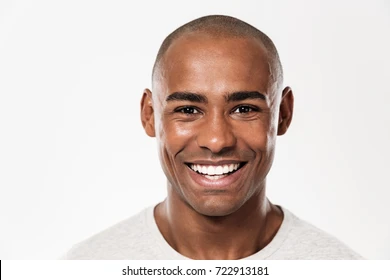

In [ ]:
face_cascade = cv2.CascadeClassifier("/content/sample_data/haarcascade_frontalface_default.xml")
img= cv2.imread("/content/sample_data/human pic.webp")
cv2_imshow(img)

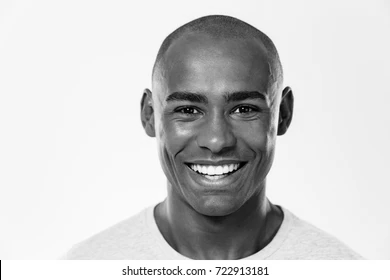

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

In [ ]:
faces = face_cascade.detectMultiScale(gray)
print(faces)

[[149  53 139 139]]


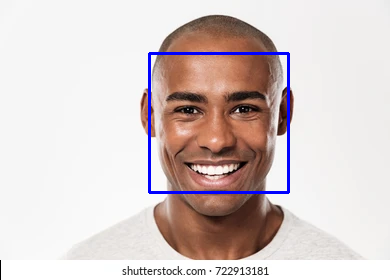

In [ ]:
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the Output
cv2_imshow(img)

**To use cam using the openCV, the code written in the below cell is used.**

*But however Google Colab being an online service has its own limitation and thus does not support the following code*

[[166  90  43  43]
 [220  93  37  37]]


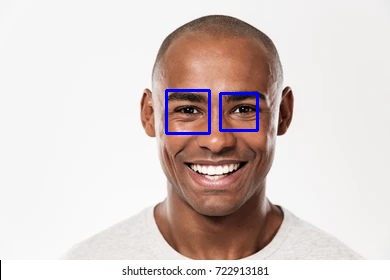

In [ ]:
eye_cascade = cv2.CascadeClassifier("/content/sample_data/haarcascade_eye.xml")
img= cv2.imread("/content/sample_data/human pic.webp")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
eyes = eye_cascade.detectMultiScale(gray)
print (eyes)
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the Output
cv2_imshow(img)

**To capture in Google Colab, use the code snippets to get the code for capture**

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
face_cascade = cv2.CascadeClassifier("/content/sample_data/haarcascade_frontalface_default.xml")
img= cv2.imread("/content/photo.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray)
print (faces)
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the Output
cv2_imshow(img)

**It's not wise to write the whole code seperately to detect human face and eyes**

So better make a function and pass the image_path to the fuction the parameter and let the function detect the human face in the image.

In [11]:
def fun_to_detect(img_path):
  face_cascade = cv2.CascadeClassifier("/content/sample_data/haarcascade_frontalface_default.xml")
  img= cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  faces = face_cascade.detectMultiScale(gray)
  for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
  # Display the Output
  cv2_imshow(img)

In [ ]:
fun_to_detect("/content/photo.jpg")

[[514  32  97  97]
 [ 42 227 107 107]
 [377 224 104 104]
 [532 230  93  93]
 [196 243  93  93]
 [ 49 371 102 102]
 [371 375 107 107]
 [535 388  92  92]
 [195 388  98  98]
 [385 524  98  98]
 [ 48 517 102 102]
 [533 533  95  95]
 [195 536  93  93]]


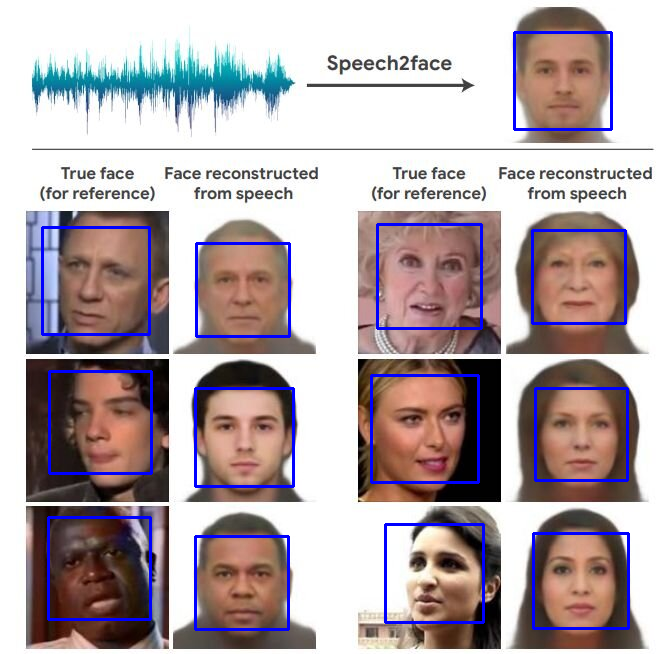

In [14]:
img_path="/content/sample_data/5d020eb457ae2.jpg"
fun_to_detect(img_path)